In [1]:
#### What is the effect on the quantum noise and the DARM Cavity Pole if we add -23.7 mm  to SR3 RoC?
#### New SRM and new SRC length?

In [2]:
%matplotlib inline
import pykat
import pylab as pl
import numpy as np

### My functions
from kat_commands import *
from cav_commands import *
from load_kat_data import *
from MMT import modematch

import get_WS
import trace_mode

                                              ..-
    PyKat 1.0.19          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [16]:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4_modified.kat"
maxtem = 2

In [41]:
#load the original kat file (ie Perfect Modematching) as a reference
basekat = pykat.finesse.kat() 
basekat.loadKatFile(katfile)
basekat.parseCommands(darm_commands)
basekat.parseCommands('''pd1 signal $fs nOMC_AROC_trans''')
basekat.parseCommands(cav_commands_FC_first)
basekat.parseCommands("maxtem "+str(maxtem))
basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

out_orig = kat.run()

### change SR3 ROC is -3 mm/Watt 
### at 7.9 watts input the change is about -23.7 mm
#kat.SR3.Rc.value = kat.SR3.Rc.value - 0.0237
kat.ls3.L.value = kat.ls3.L.value + 0.005
out_new_ROC = kat.run()

Parsing `dbs OPP nOPb nOPc nOPd nOPz` into pykat object not implemented yet, added as extra line.


In [42]:
##### Testing to trace the modes
#### Turn off all the cav commands except SRCY to extract the eigenmode at the BS
[srcx,srcy] = trace_mode.from_cav_to_BS(kat,'cavSRY')

#### Turn off all the cav commands except XARM to extract the eigenmode at the BS
[ARMx,ARMy] = trace_mode.from_cav_to_BS(kat,'cavXARM')

#### Turn off all the cav commands except OMC to extract the eigenmode at the BS
[OMCx,OMCy] = trace_mode.from_cav_to_BS(kat,'cavOMC')

#### Turn off all the cav commands except FC to extract the eigenmode at the BS
[FCx,FCy] = trace_mode.from_cav_to_BS(kat,'cavFC')

In [43]:
pykat.BeamParam.overlap(srcx,OMCx)

0.9999999409418139

C:\Users\tvo88\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


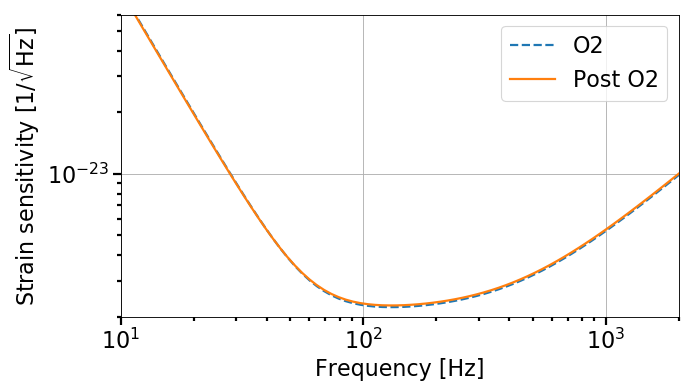

In [38]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.loglog(out_new_ROC.x, out_orig['NSR_with_RP'],'--',linewidth=2, label='O2')
pl.loglog(out_new_ROC.x, out_new_ROC['NSR_with_RP'],linewidth=2, label='Post O2')

#pl.xlim(out_new_ROC.x.min(),out_new_ROC.x.max())
pl.xlim(10,2000)
pl.ylim(2e-24,6e-23)

pl.xlabel("Frequency [Hz]",fontsize=20)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

C:\Users\tvo88\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


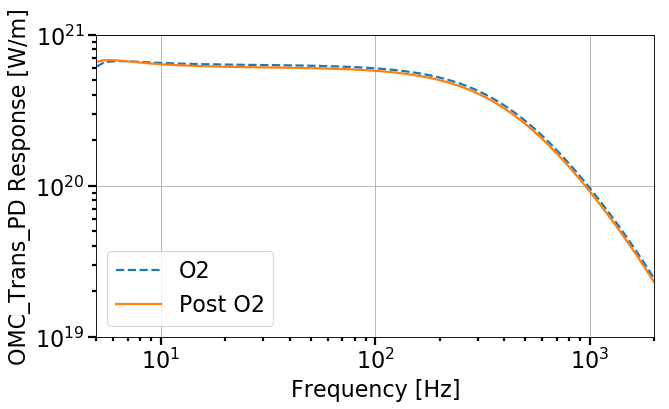

In [35]:
pl.figure(figsize=(9, 5), dpi=80)
pl.subplot(111)

pl.loglog(out_new_ROC.x, (2*np.pi/1064E-9)*out_orig['signal'],'--',linewidth=2, label='O2')
pl.loglog(out_new_ROC.x, (2*np.pi/1064E-9)*out_new_ROC['signal'],linewidth=2, label='Post O2')

#pl.xlim(out_new_ROC.x.min(),out_new_ROC.x.max())
pl.xlim(5,2000)
pl.ylim(1e19,1e21)

pl.xlabel("Frequency [Hz]",fontsize=20)
pl.ylabel("OMC_Trans_PD Response [W/m]",fontsize=20)

###Main plot formatting
pl.tick_params(labelsize=20)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()